# $$ 13-04-2022 $$

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model 

$$\epsilon_t = \omega_t\sqrt{\alpha_0+\alpha_1\epsilon_{t-1}^2 + \alpha_2\epsilon_{t-2}^2 + \beta_1\sigma_{t-1}^2 + \beta_2\sigma_{t-2}^2}$$

$$\omega_t\sim\mathcal N(0, 1)$$

$$ \epsilon_t = \sigma_t\omega_t $$

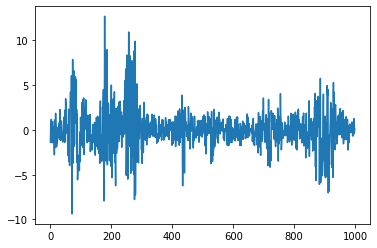

In [48]:
epsilon = [np.random.normal(0,1), np.random.normal(0,1)]
sigma = [1, 1]
a_0 = 0.1
a_1 = 0.1
a_2 = 0.3
b_1 = 0.4
b_2 = 0.2
for i in range(2, 1000):
    wt =  np.random.normal(0, 1)
    new_sigma = np.sqrt(a_0 + a_1 * epsilon[i-1]**2 + a_2 * epsilon[i-2]**2 + b_1 * sigma[i-1]**2 + b_2 * sigma[i-2]**2)
    new_epsilon = wt * new_sigma
    sigma.append(new_sigma)
    epsilon.append(new_epsilon)

plt.plot(epsilon)

In [49]:
x_train = epsilon[:600]
x_test = epsilon[600:]

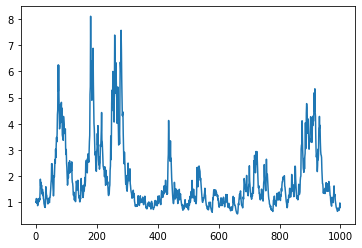

In [50]:
plt.plot(sigma)

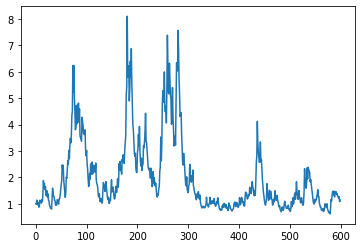

In [52]:
plt.plot(sigma[:600])

In [53]:
model = arch_model(x_train, p = 2, q = 2)

In [54]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 241415100924.9178
Iteration:      2,   Func. Count:     18,   Neg. LLF: 414315.73495269596
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1282.0849379155231
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1159.8679435384925
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1411.7344181126907
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1317.961989034126
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1195.0497152569862
Iteration:      8,   Func. Count:     68,   Neg. LLF: 1161.009722856284
Iteration:      9,   Func. Count:     76,   Neg. LLF: 1159.6477360686742
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1158.8667665521984
Iteration:     11,   Func. Count:     91,   Neg. LLF: 1158.8663860136533
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1158.8667131318934
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1158.866318535181
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1

In [23]:
print(model_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1349.70
Distribution:                  Normal   AIC:                           2711.39
Method:            Maximum Likelihood   BIC:                           2739.50
                                        No. Observations:                  800
Date:                Wed, Apr 13 2022   Df Residuals:                      799
Time:                        09:28:00   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.1962e-03  3.854e-02     -0.109      0.

In [55]:
a_0, a_1, a_2, b_1, b_2

(0.1, 0.1, 0.3, 0.4, 0.2)

In [73]:
from arch.__future__ import reindexing
predictions = model_fit.forecast(horizon = 200)

In [57]:
print(predictions.variance)

        h.001     h.002     h.003     h.004     h.005     h.006    h.007  \
0         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
1         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
2         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
3         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
4         NaN       NaN       NaN       NaN       NaN       NaN      NaN   
..        ...       ...       ...       ...       ...       ...      ...   
595       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
596       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
597       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
598       NaN       NaN       NaN       NaN       NaN       NaN      NaN   
599  1.021433  0.839814  1.054262  1.087673  1.201922  1.278196  1.37042   

        h.008     h.009     h.010  ...     h.191     h.192     h.193  \
0         NaN  

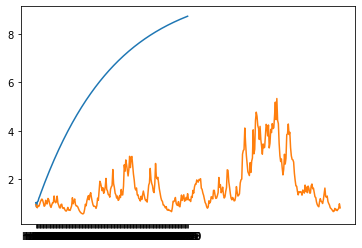

In [72]:
plt.plot(predictions.variance.iloc[599])
plt.plot(sigma[600:])
plt.show()

In [64]:
from arch.__future__ import reindexing
def rolling_predictions(n = 200):
    pred = []
    for i in range(n):
        model = arch_model(epsilon[:600+i], p = 2, q = 2)
        pred.append(model.fit().forecast(horizon = 1).variance.iloc[-1])
    return pred

pred = rolling_predictions()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 241415100924.9178
Iteration:      2,   Func. Count:     18,   Neg. LLF: 414315.73495269596
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1282.0849379155231
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1159.8679435384925
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1411.7344181126907
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1317.961989034126
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1195.0497152569862
Iteration:      8,   Func. Count:     68,   Neg. LLF: 1161.009722856284
Iteration:      9,   Func. Count:     76,   Neg. LLF: 1159.6477360686742
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1158.8667665521984
Iteration:     11,   Func. Count:     91,   Neg. LLF: 1158.8663860136533
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1158.8667131318934
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1158.866318535181
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1

Iteration:     13,   Func. Count:    105,   Neg. LLF: 1170.9694093186263
Iteration:     14,   Func. Count:    111,   Neg. LLF: 1170.9694093185103
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1170.9694093186263
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 354240876765.9875
Iteration:      2,   Func. Count:     18,   Neg. LLF: 337291551.4649475
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1530.0631757546093
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1187.552366868947
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1186.1064331985287
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1172.6892913864856
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1172.9764867287304
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1188.9474453798935
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1207.552

Iteration:     14,   Func. Count:    111,   Neg. LLF: 1183.2469295296503
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1183.2469295296
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 370835288607.355
Iteration:      2,   Func. Count:     18,   Neg. LLF: 342595866.870637
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1543.9790085857614
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1199.5162013502304
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1196.2740195673716
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1184.850480451134
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1185.2037506490246
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1201.1782407892085
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1222.8243614997177
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1184.43698376

            Current function value: 1196.4021153093508
            Iterations: 14
            Function evaluations: 111
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 131985205076.11017
Iteration:      2,   Func. Count:     18,   Neg. LLF: 344868299.89797455
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1556.4823052788627
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1212.5703785063552
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1209.9174793609354
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1197.972732450982
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1198.6557547247417
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1208.4244084713878
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1237.4129557380047
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1197.7427367142236
Iteration:     11,   Func. Count:     91,   Neg. LLF: 1197.3240538423906
Iteration:     12,   Func. Count:     98,

Iteration:      1,   Func. Count:      8,   Neg. LLF: 144065178958.01147
Iteration:      2,   Func. Count:     18,   Neg. LLF: 346895911.85434073
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1574.5862289240624
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1222.1349730776942
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1220.4304849898253
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1207.9364362696433
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1208.9214006135815
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1227.2780277382785
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1249.1779814378788
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1207.8888660484758
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1207.3209294592557
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1207.3199839007898
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1207.3199770229326
Iteration:     14,   Func. Count:    112,   Neg. LL

Iteration:      2,   Func. Count:     18,   Neg. LLF: 345807955.6046289
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1593.4637608490357
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1229.9889055138874
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1231.702662373609
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1215.9455853019551
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1218.333784823748
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1264.2986280130358
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1265.2510331105937
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1215.7034304451668
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1215.3721635609736
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1215.371493831753
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1215.3714779881489
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1215.3714779882719
Optimization terminated successfully    (Exit mode 0)
 

Iteration:      2,   Func. Count:     18,   Neg. LLF: 355201415.40592754
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1603.4722796902208
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1243.0350539626952
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1244.3607705366946
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1228.3147230924878
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1230.155659964623
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1252.0501395520118
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1274.079384220936
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1228.3619276405846
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1227.6905370809181
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1227.689319178086
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1227.6892972638102
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1227.689297264306
Optimization terminated successfully    (Exit mode 0)
 

Iteration:      2,   Func. Count:     18,   Neg. LLF: 354794332.4729664
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1621.0439225073699
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1256.616370059432
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1261.5102336573116
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1235.9501029418275
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1240.2226434727424
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1321.5213935848597
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1289.3471875611995
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1235.6739972178907
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1235.3524456183268
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1235.3502701670375
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1235.3502040507083
Iteration:     14,   Func. Count:    113,   Neg. LLF: 1235.3502020963858
Iteration:     15,   Func. Count:    119,   Neg. LLF:

            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 134090458458.96625
Iteration:      2,   Func. Count:     18,   Neg. LLF: 364902839.26962936
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1636.3905283081517
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1270.9920034093157
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1278.5163991077115
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1250.152030831532
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1254.2982044644646
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1311.1038616807027
Iteration:      9,   Func. Count:     75,   Neg. LLF: 1268.2174205423166
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1250.0165858579091
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1249.5160285869501
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1249.512857883391
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1249.5127571557346
Iteration:     1

Iteration:     12,   Func. Count:     99,   Neg. LLF: 1259.645018107759
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1259.644167588724
Iteration:     14,   Func. Count:    113,   Neg. LLF: 1259.644129524297
Iteration:     15,   Func. Count:    119,   Neg. LLF: 1259.6441295240918
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1259.644129524297
            Iterations: 15
            Function evaluations: 119
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 61101918463.80234
Iteration:      2,   Func. Count:     18,   Neg. LLF: 368979640.14123297
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1650.0137040319016
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1283.4810818729075
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1295.9664166678456
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1262.3893215089765
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1271.41468

Iteration:      2,   Func. Count:     18,   Neg. LLF: 379716004.9782262
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1663.787615280371
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1299.9821149000447
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1305.0182317963324
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1278.7401369232382
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1280.349860074552
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1292.8271066842221
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1278.7061285114632
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1283.6036730626088
Iteration:     11,   Func. Count:     90,   Neg. LLF: 1277.97134606228
Iteration:     12,   Func. Count:     97,   Neg. LLF: 1277.9691132087073
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1277.9623277110538
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1277.962297832448
Iteration:     15,   Func. Count:    118,   Neg. LLF: 127

Iteration:      2,   Func. Count:     18,   Neg. LLF: 387493641.47445273
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1683.7863702212162
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1316.600016432853
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1319.408858259933
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1295.7540097403003
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1297.1630686692965
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1312.112214136686
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1295.32896368238
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1296.514908451874
Iteration:     11,   Func. Count:     90,   Neg. LLF: 1295.3038675635005
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1294.9198537127777
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1294.9180833840026
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1294.9180596385697
Iteration:     15,   Func. Count:    118,   Neg. LLF: 129

Iteration:     11,   Func. Count:     91,   Neg. LLF: 1309.385014429104
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1309.379086353747
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1309.3786575559357
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1309.3786498613244
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1309.3786498612744
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1309.3786498613244
            Iterations: 15
            Function evaluations: 118
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 487805346584.74725
Iteration:      2,   Func. Count:     18,   Neg. LLF: 391582255.25116956
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1707.6277914700397
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1332.642025463626
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1343.4036182239633
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1311.540

Iteration:     12,   Func. Count:     96,   Neg. LLF: 1328.0242904582008
Iteration:     13,   Func. Count:    103,   Neg. LLF: 1328.0242249945152
Iteration:     14,   Func. Count:    110,   Neg. LLF: 1328.0242130018753
Iteration:     15,   Func. Count:    116,   Neg. LLF: 1328.0242130020365
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1328.0242130018753
            Iterations: 15
            Function evaluations: 116
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 143598378128.0491
Iteration:      2,   Func. Count:     18,   Neg. LLF: 88813.36205345426
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1477.7353001512795
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1331.8411867306231
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1624.0590203824647
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1406.571178142433
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1360.351

Iteration:     13,   Func. Count:    106,   Neg. LLF: 1350.1501596077192
Iteration:     14,   Func. Count:    113,   Neg. LLF: 1350.1501168747586
Iteration:     15,   Func. Count:    119,   Neg. LLF: 1350.150116874718
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1350.1501168747586
            Iterations: 15
            Function evaluations: 119
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 12699.551534866463
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1982798.237709608
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1500.734414013113
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1353.3545367501065
Iteration:      5,   Func. Count:     42,   Neg. LLF: 1638.9911936112524
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1467.2410410202756
Iteration:      7,   Func. Count:     60,   Neg. LLF: 1397.6273637961494
Iteration:      8,   Func. Count:     68,   Neg. LLF: 1368.073

Iteration:      1,   Func. Count:      8,   Neg. LLF: 632471841913.5281
Iteration:      2,   Func. Count:     18,   Neg. LLF: 415457897.67105746
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1785.1988457887637
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1387.644136316998
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1419.6342366810554
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1368.6461564277413
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1371.6863993208115
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1379.610786772303
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1396.1790442386978
Iteration:     10,   Func. Count:     83,   Neg. LLF: 1368.32603150767
Iteration:     11,   Func. Count:     91,   Neg. LLF: 1367.7395860878632
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1367.733374199476
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1367.7332810456219
Iteration:     14,   Func. Count:    112,   Neg. LLF: 136

Iteration:     13,   Func. Count:    105,   Neg. LLF: 1380.2801158688687
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1380.2801060149052
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1380.2801060149181
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1380.2801060149052
            Iterations: 15
            Function evaluations: 118
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 144699978672.56412
Iteration:      2,   Func. Count:     18,   Neg. LLF: 417335310.2384118
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1792.7016744712582
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1402.104875977761
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1423.5385711388813
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1382.7804027787263
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1384.0812886237352
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1427.66

Iteration:      1,   Func. Count:      8,   Neg. LLF: 178304948288.09113
Iteration:      2,   Func. Count:     18,   Neg. LLF: 2251210.848566339
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1580.5423329211956
Iteration:      4,   Func. Count:     34,   Neg. LLF: 1402.0099056967085
Iteration:      5,   Func. Count:     41,   Neg. LLF: 1488.118622160286
Iteration:      6,   Func. Count:     50,   Neg. LLF: 1734.9528904412582
Iteration:      7,   Func. Count:     59,   Neg. LLF: 1840.70953451361
Iteration:      8,   Func. Count:     67,   Neg. LLF: 1433.1790926149256
Iteration:      9,   Func. Count:     76,   Neg. LLF: 1401.0613544235412
Iteration:     10,   Func. Count:     84,   Neg. LLF: 1400.8234232006737
Iteration:     11,   Func. Count:     91,   Neg. LLF: 1400.8223924180668
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1400.8221498553994
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1400.822144876695
Iteration:     14,   Func. Count:    111,   Neg. LLF: 14

Iteration:     10,   Func. Count:     84,   Neg. LLF: 1419.8121316025456
Iteration:     11,   Func. Count:     92,   Neg. LLF: 1419.0798770035908
Iteration:     12,   Func. Count:     99,   Neg. LLF: 1419.0762435807624
Iteration:     13,   Func. Count:    106,   Neg. LLF: 1419.0762340196857
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1419.0762340194924
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1419.0762340196857
            Iterations: 14
            Function evaluations: 112
            Gradient evaluations: 14
Iteration:      1,   Func. Count:      8,   Neg. LLF: 519673286301.55084
Iteration:      2,   Func. Count:     18,   Neg. LLF: 312886.4310927519
Iteration:      3,   Func. Count:     26,   Neg. LLF: 1570.30175537714
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1903.4572076395734
Iteration:      5,   Func. Count:     44,   Neg. LLF: 1515.8493482492045
Iteration:      6,   Func. Count:     52,   Neg. LLF: 1421.439

Iteration:     11,   Func. Count:     91,   Neg. LLF: 1430.1919994164791
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1430.182413461981
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1430.1818264469935
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1430.181819153568
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1430.1818191536154
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1430.181819153568
            Iterations: 15
            Function evaluations: 118
            Gradient evaluations: 15
Iteration:      1,   Func. Count:      8,   Neg. LLF: 669945373203.8102
Iteration:      2,   Func. Count:     18,   Neg. LLF: 428865488.46200037
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1851.5387096783313
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1447.1598023870758
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1502.2973822349077
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1431.9214

Iteration:     14,   Func. Count:    112,   Neg. LLF: 1436.6875445801638
Iteration:     15,   Func. Count:    119,   Neg. LLF: 1436.687536872937
Iteration:     16,   Func. Count:    125,   Neg. LLF: 1436.6875368729147
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1436.687536872937
            Iterations: 16
            Function evaluations: 125
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      8,   Neg. LLF: 92838776202.42361
Iteration:      2,   Func. Count:     18,   Neg. LLF: 428034935.94283634
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1855.5392622778259
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1457.0282127756252
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1502.928940668248
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1440.3404309518942
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1443.2852987388205
Iteration:      8,   Func. Count:     66,   Neg. LLF: 1452.8078

Iteration:      8,   Func. Count:     66,   Neg. LLF: 1461.0746391028397
Iteration:      9,   Func. Count:     74,   Neg. LLF: 1450.3312066357369
Iteration:     10,   Func. Count:     82,   Neg. LLF: 1450.8324523557949
Iteration:     11,   Func. Count:     90,   Neg. LLF: 1449.4243107432585
Iteration:     12,   Func. Count:     98,   Neg. LLF: 1449.2312704838805
Iteration:     13,   Func. Count:    105,   Neg. LLF: 1449.2277645699985
Iteration:     14,   Func. Count:    112,   Neg. LLF: 1449.2277053822972
Iteration:     15,   Func. Count:    119,   Neg. LLF: 1449.227704022338
Iteration:     16,   Func. Count:    125,   Neg. LLF: 1449.2277040223366
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1449.227704022338
            Iterations: 16
            Function evaluations: 125
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      8,   Neg. LLF: 751244233052.1737
Iteration:      2,   Func. Count:     18,   Neg. LLF: 42975483

Iteration:     13,   Func. Count:    104,   Neg. LLF: 1461.508452289369
Iteration:     14,   Func. Count:    111,   Neg. LLF: 1461.5083878798418
Iteration:     15,   Func. Count:    118,   Neg. LLF: 1461.5083855289708
Iteration:     16,   Func. Count:    124,   Neg. LLF: 1461.5083855290682
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1461.5083855289708
            Iterations: 16
            Function evaluations: 124
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      8,   Neg. LLF: 760002031466.4384
Iteration:      2,   Func. Count:     18,   Neg. LLF: 435190069.9954339
Iteration:      3,   Func. Count:     27,   Neg. LLF: 1875.8637737724778
Iteration:      4,   Func. Count:     35,   Neg. LLF: 1478.371063255985
Iteration:      5,   Func. Count:     43,   Neg. LLF: 1511.3639147792137
Iteration:      6,   Func. Count:     51,   Neg. LLF: 1463.8817684034973
Iteration:      7,   Func. Count:     58,   Neg. LLF: 1467.1574

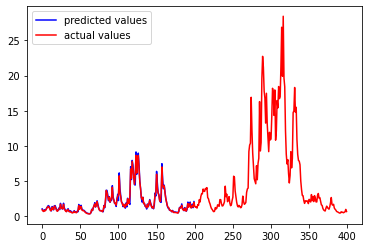

In [71]:
plt.plot(pred, color = "blue", label='predicted values')
plt.plot([item**2 for item in sigma[600:]], color = "red", label='actual values')
plt.legend()